In [1]:
#Import Packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn,os,pickle,datetime

In [2]:
#Data Loading
path = r"C:\Users\youth\OneDrive\Desktop\YPAI08(Deep Learning)\Deeplearninglatest\nlp\assessment3\ecommerceDataset.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [3]:
#Separate columns for category and description
df.columns = ['category', 'description']
df.head()

,category,description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [4]:
#3. Data inspection
print("Shape of data: ", df.shape)
print("Data description: ", df.describe().transpose())
print("Example data:\n", df.head(1))
print("NA values: ", df.isna().sum())
print("Number of duplicates :",df.duplicated().sum())
print("Value counts:\n",df["category"].value_counts())

Shape of data:  (50424, 2)
Data description:               count unique                                                top  \
category     50424      4                                          Household   
description  50423  27801  Think & Grow Rich About the Author NAPOLEON HI...   

              freq  
category     19312  
description     30  
Example data:
     category                                        description
0  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
NA values:  category       0
description    1
dtype: int64
Number of duplicates : 22622
Value counts:
 category
Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [5]:
#4. Data preprocessing
#(A) Isolate the features and labels
features = df["description"].values
labels = df["category"].values
#(B) Perform label encoding on category column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [6]:
#5. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels_encoded,train_size=0.8,random_state=42)

In [7]:
#6. Tokenization
#Define Hyperparameters
vocab_size = 5000
oov_token = "<OOV>"
max_length = 200
embedding_dim = 64
# Convert all elements in X_train to strings
X_train = [str(x) for x in X_train]

#Define the Tokenizer object
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,
    oov_token=oov_token,
    split=" "

)

tokenizer.fit_on_texts(X_train)

In [8]:
#Inspection on the Tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'for': 7,
 'in': 8,
 'with': 9,
 'is': 10,
 'your': 11,
 'you': 12,
 'it': 13,
 'this': 14,
 'on': 15,
 'from': 16,
 'that': 17,
 'or': 18,
 'can': 19,
 'as': 20,
 'are': 21,
 '1': 22,
 'be': 23,
 'an': 24,
 'all': 25,
 '2': 26,
 'has': 27,
 'at': 28,
 'by': 29,
 '3': 30,
 '5': 31,
 'will': 32,
 'size': 33,
 'book': 34,
 'x': 35,
 'use': 36,
 'set': 37,
 'easy': 38,
 'quality': 39,
 'up': 40,
 'one': 41,
 'not': 42,
 'which': 43,
 'high': 44,
 'have': 45,
 'about': 46,
 'also': 47,
 'black': 48,
 'product': 49,
 '4': 50,
 'he': 51,
 'made': 52,
 'home': 53,
 'design': 54,
 'more': 55,
 'author': 56,
 'our': 57,
 'any': 58,
 'its': 59,
 'his': 60,
 'color': 61,
 'new': 62,
 'time': 63,
 'power': 64,
 'we': 65,
 '6': 66,
 'cotton': 67,
 'these': 68,
 'other': 69,
 'usb': 70,
 'best': 71,
 'perfect': 72,
 'light': 73,
 'comes': 74,
 'most': 75,
 'make': 76,
 'features': 77,
 'no': 78,
 'so': 79,
 'used': 80,
 'material': 81,

In [9]:
#Use the tokenizer to transform text to token
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
print(X_train[0])
print(X_train_tokens[0])

BAYA Check Muffler, scarf for Men,Women and girls (Checked Black,Brown,Red) Each color, design and style of our fashion scarves speaks volumes of the revitalizing and overwhelming universe of fashion and poise. We are one of the leading manufacturers, wholesale suppliers and exporters of a latest collection of fashion scarves such as turquoise scarf, fashion scarves, ladies designer scarves & neck scarf. Manufactured from warm & soft fabric, these scarves are the fashion staple for every Men and Woman.
[1, 922, 1, 2117, 7, 282, 187, 3, 357, 1, 48, 381, 244, 230, 61, 54, 3, 94, 4, 57, 434, 1, 1, 4951, 4, 2, 1, 3, 1, 1911, 4, 434, 3, 1, 65, 21, 41, 4, 2, 680, 2555, 1, 1, 3, 4759, 4, 6, 385, 335, 4, 434, 1, 228, 20, 1, 2117, 434, 1, 2528, 1013, 1, 692, 2117, 1351, 16, 409, 117, 127, 68, 1, 21, 2, 434, 1, 7, 166, 282, 3, 1692]


In [10]:
#Perform padding and truncating,for padding and truncating in nlp problem we normally use post
X_train_padded = keras.utils.pad_sequences(
    X_train_tokens,
    maxlen=max_length,
    padding = "post",
    truncating="post"
)
X_test_padded = keras.utils.pad_sequences(
    X_test_tokens,
    maxlen=max_length,
    padding = "post",
    truncating="post"
)
print(X_train_padded.shape)

(40339, 200)


In [11]:
# Create a function that can decode the token
# (A) Create a reversed word index
reversed_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [12]:
#Create the function for the decoding
def decode_tokens(tokens):
    return " ".join([reversed_word_index.get(i,"?")for i in tokens])

print(X_train[3])
print("----------------")
print(decode_tokens(X_train_padded[3]))

Gizga Essentials Professional Lens Pen Cleaning Pro System + 6-in-1 Cleaning Kit + Professional Wipes for Cameras and Sensitive Electronics Size name:Mega Camera Cleaning Combo   Mega camera cleaning combo, professional 6-in-1 cleaning kit, lens pen pro, professional wipes. Plush and sued microfiber cleaning cloth (1 piece). Plush and sued microfiber cleaning cloth extremely fine microfiber leaves zero scratches, streaks or marks and imitates strength of suede leather. Made with premium materials and highest standard quality. Safe for all lens cameras. Cotton swab. 100 percent pure cotton swabs (10 nos) is effective and efficient cleaning for hard to reach areas. Air blower cleaner, air blower direct a powerful stream of air to blow away dirt and specks from lenses, DSLR sensors and camera mirrors. Safer and easier to control than compressed air. Professional cleaning brush. Disposable, static-free and contains no abrasives or silicon's. Perfect for cleaning camera lenses and other opt

### Model Training

In [13]:
#Model development
model = keras.Sequential()
#Create the embedding layer to perform token embedding 
model.add(keras.layers.Embedding(vocab_size,embedding_dim))
#Proceed to build the RNN as the subsequent layers
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32,return_sequences=False)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(len(np.unique(labels)),activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 345,092
Trainable params: 345,092
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model 
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#Model training
#Earlystopping callback
early_stopping = keras.callbacks.EarlyStopping(patience=3)
#Tensorboard callback
logpath = os.path.join("tensorboard.log",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = tf.keras.callbacks.TensorBoard(logpath)
#Set epoch
max_epoch = 10
history = model.fit(X_train_padded,y_train,validation_data = (X_test_padded, y_test),epochs = max_epoch,callbacks = [early_stopping,tb])

Epoch 1/10
1261/1261 [==============================] - 120s 93ms/step - loss: 0.2759 - accuracy: 0.9176 - val_loss: 0.1228 - val_accuracy: 0.9672
Epoch 2/10
1261/1261 [==============================] - 116s 92ms/step - loss: 0.1021 - accuracy: 0.9729 - val_loss: 0.1016 - val_accuracy: 0.9722
Epoch 3/10
1261/1261 [==============================] - 122s 97ms/step - loss: 0.0713 - accuracy: 0.9817 - val_loss: 0.1128 - val_accuracy: 0.9706
Epoch 4/10
1261/1261 [==============================] - 141s 112ms/step - loss: 0.0533 - accuracy: 0.9865 - val_loss: 0.1018 - val_accuracy: 0.9745
Epoch 5/10
1261/1261 [==============================] - 123s 98ms/step - loss: 0.0417 - accuracy: 0.9889 - val_loss: 0.1041 - val_accuracy: 0.9756


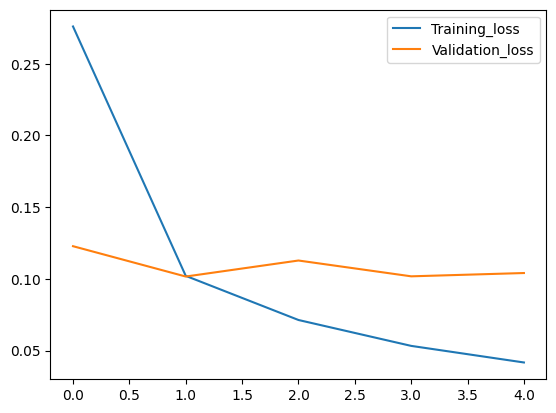

In [15]:
#Training Results
#Plot graphs of loss and accuracy
#(A) Loss graph
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training_loss","Validation_loss"])
plt.show()

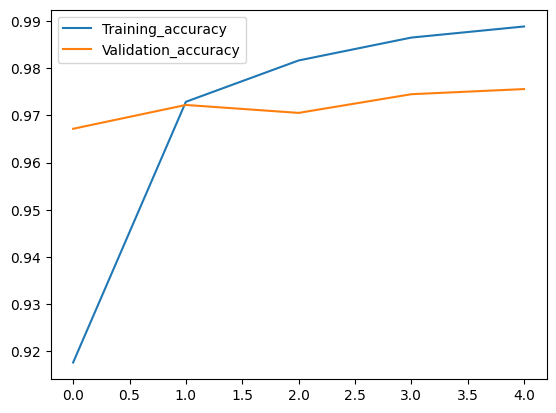

In [16]:
#Acurracy graph
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_accuracy","Validation_accuracy"])
plt.show()

### Model Evaluation

In [23]:
# F1 Score
import numpy as np
from sklearn.metrics import f1_score

y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print('F1 Score: ', f1)

316/316 [==============================] - 7s 22ms/step
F1 Score:  0.9756190015656783


### Save Components



In [25]:
#Save the important components
#(A) Label Encoder
label_encoder_save_path = "label_encoder_assessment.pkl"
with open (label_encoder_save_path,"wb")as f:
    pickle.dump(label_encoder,f)

#(B) Tokenizer
tokenizer_save_path = "tokenizer_assessment.pkl"
with open (tokenizer_save_path,"wb")as f:
    pickle.dump(tokenizer,f)

### Model save 

In [26]:
#Save as h5 model
model.save(os.path.join('models','categorizeproduct_v1.h5'))

In [27]:
#(C) Keras Model(For Model Deployment)
model_save_path = "model_nlp"
keras.models.save_model(model,model_save_path)

INFO:tensorflow:Assets written to: model_nlp\assets


INFO:tensorflow:Assets written to: model_nlp\assets
